In [318]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install ptitprince

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/florianpolis-rent-pricing-dataset/LICENSE
/kaggle/input/florianpolis-rent-pricing-dataset/README.md
/kaggle/input/florianpolis-rent-pricing-dataset/florianopolis-rent-pricing.ipynb
/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv


# Carregar dados para um Dataframe

In [319]:
# Definindo a tipagem dos dados por coluna
dtypes = {
          'data': 'datetime64[s]',
          'fonte':'str',
          'descricao': 'str',
          'endereco':'str',
          'rua': 'str',
          'numero': 'float',
          'bairro':'category',
          'cidade': 'category',
          'valor':'float',
          'periodicidade': 'category',
          'condominio': 'float',
          'area':'float',
          'qtd_banheiros': 'float',
          'qtd_quartos':'float',
          'qtd_vagas':'float',
          'url':'str'
          }

In [320]:
# Importando o arquivo do dataset e carregando a tipagem
df = pd.read_csv('/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv',index_col=0) # Coluna 0 serve como índice
df = df.astype(dtypes)
pd.set_option('display.precision', 2) # Definindo a precisão em dígitos com a qual os números float64 serão exibidos.

# Observando exemplos de registros:

In [321]:
#df.sample(n=10,random_state=122) # Amostra aleatória de 10 registros, reproduzível com a seed 122 no parâmetro 'random_state'.

> Podemos ver que há anúncios mensais e diários, e em ambos os casos o valor de condomínio precisa ser acrescido do valor total, faremos da seguinte forma:

In [322]:
df['area'] = df['area'].fillna(0).astype('int')
df['condominio'] = df['condominio'].fillna(0).astype('int')
df['valor_corrigido'] = df.apply(lambda row: row['valor'] + row['condominio'] if not pd.isnull(row['valor']) and not pd.isnull(row['condominio']) else row['valor'], axis=1).fillna(0).astype('int')
df

,data,fonte,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,valor_corrigido
0,2023-10-25 22:51:48,Viva Real,"Casa com 4 Quartos para Aluguel, 250m²","Rua das Piraúnas , Jurerê Internacional, Flori...",Rua das Piraúnas,NaN,Jurerê Internacional,florianopolis,2300.0,Dia,0,250,5.0,4.0,2.0,https://vivareal.com.br/imovel/casa-4-quartos-...,2300
1,2023-10-25 22:51:48,Viva Real,"Apartamento com Quarto para Aluguel, 58m²","Servidão Feliciano Martins Vieira, 155 , Itaco...",Servidão Feliciano Martins Vieira,NaN,Itacorubi,florianopolis,2500.0,Mês,482,58,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,2982
2,2023-10-25 22:51:48,Viva Real,"Apartamento com 2 Quartos para Aluguel, 60m²","Rua Alves de Brito, 345 , Centro, Florianópoli...",Rua Alves de Brito,NaN,Centro,florianopolis,3950.0,Mês,685,60,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,4635
3,2023-10-25 22:51:48,Viva Real,"Apartamento com 2 Quartos para Aluguel, 60m²","Rua Major Câmara, 122 B , Ingleses do Rio Verm...",Rua Major Câmara,NaN,Ingleses do Rio Vermelho,florianopolis,2360.0,Mês,0,60,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,2360
4,2023-10-25 22:51:48,Viva Real,"Casa com 3 Quartos para Aluguel, 200m²","Rodovia Virgílio Várzea, 4690 , Canasvieiras, ...",Rodovia Virgílio Várzea,NaN,Canasvieiras,florianopolis,1600.0,Dia,0,200,3.0,3.0,2.0,https://vivareal.com.br/imovel/casa-de-condomi...,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7411,2023-10-25 23:02:30,Viva Real,"Casa com 2 Quartos para Aluguel, 75m²","Rua Biguaçu, 99 , Capoeiras, Florianópolis , SC",Rua Biguaçu,NaN,Capoeiras,florianopolis,2300.0,Mês,0,75,2.0,2.0,1.0,https://vivareal.com.br/imovel/casa-2-quartos-...,2300
7412,2023-10-25 23:02:30,Viva Real,"Casa com 2 Quartos para Aluguel, 50m²","Rua Luiz Pasteur , Trindade, Florianópolis , SC",Rua Luiz Pasteur,NaN,Trindade,florianopolis,1750.0,Mês,0,50,1.0,2.0,NaN,https://vivareal.com.br/imovel/casa-2-quartos-...,1750
7413,2023-10-25 23:02:30,Viva Real,"Casa com 4 Quartos para Aluguel, 100m²","Rua Desembargador Rid Silva, 336 , Canasvieira...",Rua Desembargador Rid Silva,NaN,Canasvieiras,florianopolis,2000.0,Dia,0,100,3.0,4.0,NaN,https://vivareal.com.br/imovel/casa-4-quartos-...,2000
7414,2023-10-25 23:02:30,Viva Real,"Apartamento com 2 Quartos para Aluguel, 130m²","Rua Madre Maria Vilac, 604 , Canasvieiras, Flo...",Rua Madre Maria Vilac,NaN,Canasvieiras,florianopolis,700.0,Dia,0,130,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,700


# Avaliando os tipos e consistência das colunas

In [323]:
#Informações sobre as colunas do dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 7415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   data             7416 non-null   datetime64[s]
 1   fonte            7416 non-null   object       
 2   descricao        7416 non-null   object       
 3   endereco         7416 non-null   object       
 4   rua              7416 non-null   object       
 5   numero           0 non-null      float64      
 6   bairro           7416 non-null   category     
 7   cidade           7416 non-null   category     
 8   valor            7416 non-null   float64      
 9   periodicidade    7416 non-null   category     
 10  condominio       7416 non-null   int64        
 11  area             7416 non-null   int64        
 12  qtd_banheiros    7416 non-null   float64      
 13  qtd_quartos      7004 non-null   float64      
 14  qtd_vagas        6592 non-null   float64      
 15  url      

> Parece que temos um erro na coluna 'numero'...

In [324]:
# Extraíndo medidas descritivas de variáveis quantitativas
df.describe()

,data,numero,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_corrigido
count,7416,0.0,7416.00,7416.00,7416.00,7416.00,7004.00,6592.00,7416.00
mean,2023-10-25 22:56:57,NaN,2543.33,182.28,87.83,1.81,2.35,1.22,2725.61
min,2023-10-25 22:51:48,NaN,700.00,0.00,30.00,1.00,1.00,1.00,700.00
25%,2023-10-25 22:54:16,NaN,1862.50,0.00,59.50,1.00,2.00,1.00,1862.50
50%,2023-10-25 22:56:50,NaN,2380.00,0.00,77.50,2.00,2.00,1.00,2556.50
75%,2023-10-25 22:59:38,NaN,3150.00,417.25,95.25,2.00,3.00,1.00,3662.50
max,2023-10-25 23:02:30,NaN,5800.00,685.00,250.00,5.00,5.00,3.00,5800.00
std,NaN,NaN,1063.96,250.65,48.89,1.02,0.94,0.48,1172.13


In [325]:
for i in df.describe().columns:
    fig = px.violin(df, x=i, title=i, color='periodicidade')
    fig.show()

<Axes: xlabel='periodicidade', ylabel='area'>

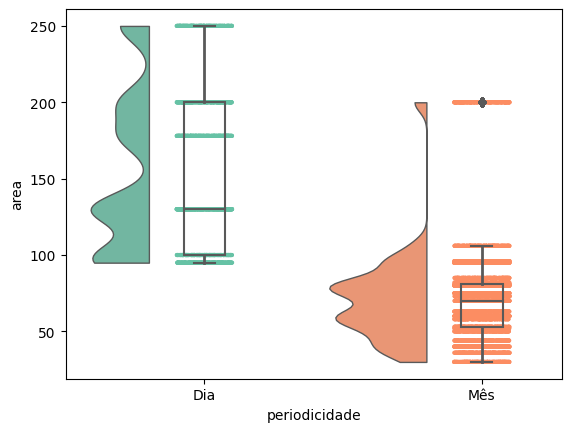

In [333]:
import ptitprince as pt
pt.RainCloud(data=df,x='periodicidade',y='area',)

# Calculando correlação de variáveis quantitativas

In [334]:
# Estimando correlação de variaveis quantitativas
df_corr = df[[
            'valor',
            'condominio',
            'area',
            'qtd_banheiros',
            'qtd_quartos',
            'qtd_vagas',
            'valor_corrigido'
            ]]
df_corr = df_corr.corr()
df_corr

,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_corrigido
valor,1.00e+00,0.34,0.17,0.20,0.21,5.33e-03,0.98
condominio,3.36e-01,1.00,-0.18,0.02,-0.06,-2.36e-01,0.52
area,1.71e-01,-0.18,1.00,0.68,0.74,6.21e-01,0.12
qtd_banheiros,1.96e-01,0.02,0.68,1.00,0.63,5.15e-01,0.18
qtd_quartos,2.15e-01,-0.06,0.74,0.63,1.00,4.78e-01,0.18
qtd_vagas,5.33e-03,-0.24,0.62,0.52,0.48,1.00e+00,-0.05
valor_corrigido,9.80e-01,0.52,0.12,0.18,0.18,-4.72e-02,1.00


In [335]:
# Importando Plotly para visualizações:

import plotly.express as px

fig = px.imshow(df_corr)
fig.show()

# Calculando Distribuição das variáveis qualitativas

In [336]:
# Listando todas as variáveis
columns = df.columns
columns

Index(['data', 'fonte', 'descricao', 'endereco', 'rua', 'numero', 'bairro',
       'cidade', 'valor', 'periodicidade', 'condominio', 'area',
       'qtd_banheiros', 'qtd_quartos', 'qtd_vagas', 'url', 'valor_corrigido'],
      dtype='object')

In [337]:
# Criando uma lista com colunas qualitativas
qualitative = ['bairro','periodicidade']

In [338]:
df_bairro = pd.DataFrame(df['bairro'].value_counts()).reset_index()
fig = px.bar(df_bairro, y='bairro', x='count', color='bairro')
fig.show()

> A distribuição não parece normal, algo no algorítmo do site pode influenciar nisso, ou até mesmo o script de coleta.

In [339]:
df_periodicidade = pd.DataFrame(df['periodicidade'].value_counts()).reset_index()
fig = px.bar(df_periodicidade, y='periodicidade', x='count', color='periodicidade')
fig.show()

# Correlação de Variáveis:

### Area vs. Valor:

In [340]:
df_scatter = df[['area','valor_corrigido','qtd_quartos','periodicidade']].copy()
fig = px.scatter(df_scatter, x='area',y='valor_corrigido',color='periodicidade',size='valor_corrigido',size_max=20,height=800,trendline='ols')
fig.show()